In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)


In [9]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


<AxesSubplot: >

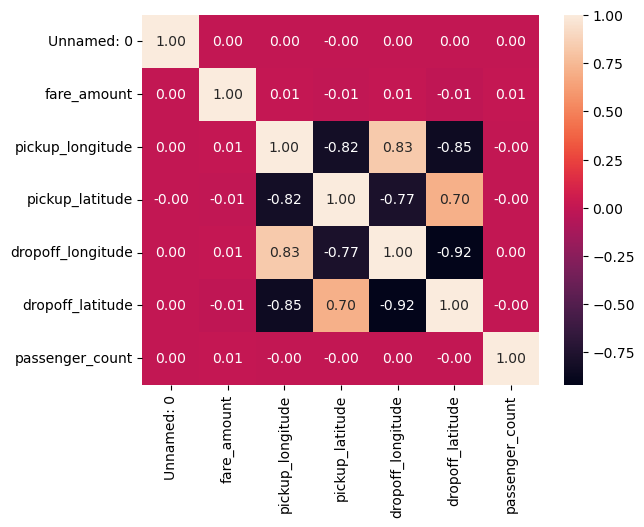

In [15]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [16]:
df.dropna(inplace=True)

In [17]:
df.drop(columns=['Unnamed: 0','pickup_datetime','key'],inplace=True)

<AxesSubplot: xlabel='fare_amount'>

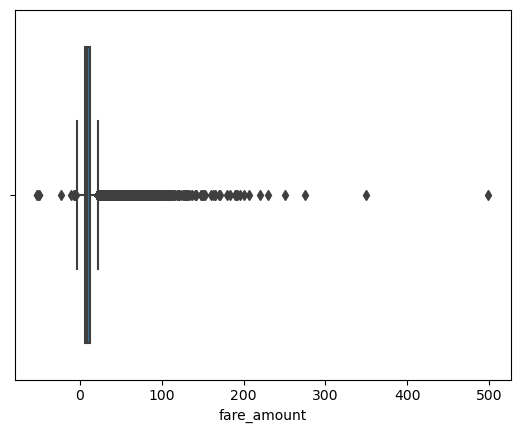

In [18]:
sns.boxplot(x=df["fare_amount"])

In [21]:
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 50)]

<AxesSubplot: xlabel='fare_amount'>

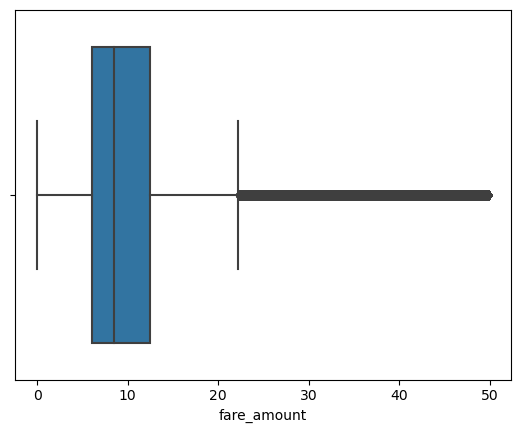

In [22]:
sns.boxplot(x=df["fare_amount"])

In [24]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5


In [28]:
sc  = StandardScaler()
df = sc.fit_transform(df)

In [30]:
df = pd.DataFrame(df,columns=['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count'])

In [31]:
y = df['fare_amount']
X = df.drop(columns=['fare_amount'])


In [34]:
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-0.127764,0.102892,-0.111060,0.116455,-0.493289
1,-0.127285,0.101579,-0.110693,0.120464,-0.493289
2,-0.128222,0.103205,-0.108238,0.123765,-0.493289
3,-0.125686,0.109699,-0.108448,0.128305,0.948559
4,-0.121206,0.103635,-0.109042,0.122079,2.390407


In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [46]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [47]:
from sklearn.metrics import r2_score,mean_squared_error

In [48]:
lre = LinearRegression()
lre.fit(X_train_pca,y_train)
y_pred = lre.predict(X_test_pca)
rms = np.sqrt(mean_squared_error(y_test,y_pred))

In [49]:
print(rms)

0.9985802160706505


In [54]:
pca = PolynomialFeatures(degree=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [55]:
lre = LinearRegression()
lre.fit(X_train_pca,y_train)
y_pred = lre.predict(X_test_pca)
rms = np.sqrt(mean_squared_error(y_test,y_pred))
print(rms)

1.680858867941696


In [58]:
lre = LinearRegression()
lre.fit(X_train,y_train)
y_pred = lre.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test,y_pred))
print(rms)

0.9985683435689717


In [59]:
r2_error = r2_score(y_test,y_pred)
r2_error

-0.00010581636165873931